## PCA Calculations
Principal Component Analysis calculation

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


Find the Sample mean of each column 

In [0]:
X = np.array([[3,2,1],[2,4,5],[1,2,3],[0,2,5]])

mean = np.mean(X, axis=0)
print("mean of X columnwise -- {0}\n ".format(mean))


mean of X columnwise -- [1.5 2.5 3.5]
 


Zero Center the samples and calculate the covariance materix   
1. Using the formiula in the class    
2. Using the Nump cov method   

Also calculate the eigenvalues and eigenvectors of the covariance
matrix Q

In [0]:
zeroCentered = (X - mean)/X.std(axis=0)

#(X.T*X)/n where n is the min(number of samples, number of features(dimensions))
X_cov_formula = (np.dot(zeroCentered.T,zeroCentered))/3
print("X_cov_formula \n", X_cov_formula)

Q = np.cov(zeroCentered.T)
print("\nQ Covariance Matrix from Numpy \n",Q)

#eigenvalues and eigenvectors of the data covariance matrix Q.
eigenValues, eigenVectors = np.linalg.eig(Q)
print("\n For covariance matrix Q \n\n eigen values -- {0} \n\n eigen vectors -- \n{1}".format(eigenValues,eigenVectors))


X_cov_formula 
 [[ 1.33333333  0.34426519 -0.89893315]
 [ 0.34426519  1.33333333  0.69631062]
 [-0.89893315  0.69631062  1.33333333]]

Q Covariance Matrix from Numpy 
 [[ 1.33333333  0.34426519 -0.89893315]
 [ 0.34426519  1.33333333  0.69631062]
 [-0.89893315  0.69631062  1.33333333]]

 For covariance matrix Q 

 eigen values -- [0.01487691 1.66438126 2.32074183] 

 eigen vectors -- 
[[ 0.57406999 -0.58872937 -0.56907062]
 [-0.49454449 -0.80321447  0.33207267]
 [ 0.6525867  -0.09079778  0.75225419]]


Run PCA on the data and find the PCA Coefficients 

In [0]:
pca = PCA(n_components=2)
pca = pca.fit(X)
X_PCA_Transform = pca.transform(X)

# print("PCA Coeficients / Scores")
# print(pca.score_samples(X))

coefficients = pd.DataFrame(data = X_PCA_Transform, columns = ['PC1', 'PC2'])
print("Coefficients of PCA")
print(coefficients)


Coefficients of PCA
        PC1       PC2
0  2.951456  0.176110
1 -1.371043  1.694062
2  0.306825 -0.786944
3 -1.887237 -1.083227


Text(0, 0.5, 'Second Principal Component')

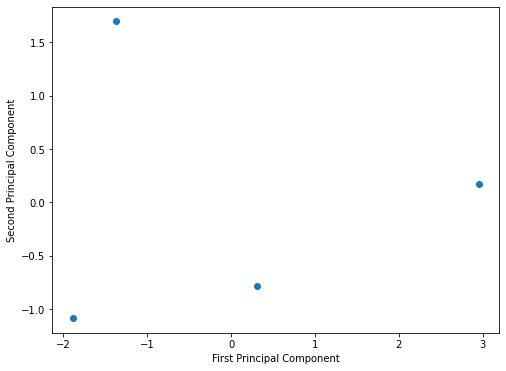

In [0]:
# Display the Principal Components 
plt.figure(figsize =(8, 6)) 
plt.scatter(X_PCA_Transform[:, 0], X_PCA_Transform[:, 1])
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component') 


Reconstruct the original samples from the top two principal components

In [0]:
reconstructredData = pca.inverse_transform(X_PCA_Transform)
print("Original Zero Centered \n {0}".format(Q))
print("\nReconstructed from PCA components \n {0}".format(reconstructredData))


Original Zero Centered 
 [[ 1.33333333  0.34426519 -0.89893315]
 [ 0.34426519  1.33333333  0.69631062]
 [-0.89893315  0.69631062  1.33333333]]

Reconstructed from PCA components 
 [[ 2.94726021  2.05905526  0.95970224]
 [ 2.0118026   3.98678407  5.0090182 ]
 [ 1.11353336  1.87287129  3.0867493 ]
 [-0.07259617  2.08128939  4.94453025]]


Report the reconstruction error for each of the samples.

In [0]:
error = ((X - reconstructredData)**2).mean(axis = 1)
print("\n")
for i,x in enumerate(error):
  print("error in sample {0} = {1}".format(i+1,x))



error in sample 1 = 0.0026309726752836763
error in sample 2 = 0.00013176335616465643
error in sample 3 = 0.012192325401358103
error in sample 4 = 0.004985020477602205
